KNN is a classification algorithm which: <br>
(1) find the neareast K points<br>
(2) choose the class having the majority 

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer

%matplotlib inline

In [18]:
cancer = load_breast_cancer()
print(type(cancer))
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.info()
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])

<class 'sklearn.utils.Bunch'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 

It is good that there is no null in features, no cleaning is needed!<br>
KNN is distance based :<br>
(1) no null, all numerical<br>
(2) Need standard scaled : z = (x-u)/sd, not easily affected by outlier<br>
such that u = 0, sd = 1(i.e. with_mean = True, with_std = True as default )

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(df_feat) # this output is ndarray => need convert it to df again
df_feat = pd.DataFrame(scaled_feat,columns=df_feat.columns)
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [48]:
df_target

,Cancer
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat,df_target['Cancer'],
                                                    test_size=0.30)
type(y_test)

pandas.core.series.Series

Text(0, 0.5, 'Error Rate')

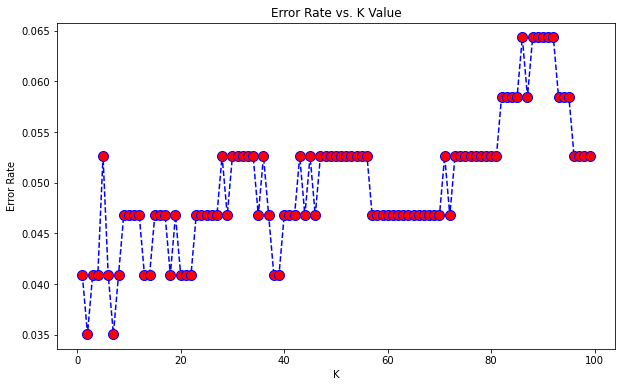

In [54]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [55]:
print(error_rate)

[0.04093567251461988, 0.03508771929824561, 0.04093567251461988, 0.04093567251461988, 0.05263157894736842, 0.04093567251461988, 0.03508771929824561, 0.04093567251461988, 0.04678362573099415, 0.04678362573099415, 0.04678362573099415, 0.04678362573099415, 0.04093567251461988, 0.04093567251461988, 0.04678362573099415, 0.04678362573099415, 0.04678362573099415, 0.04093567251461988, 0.04678362573099415, 0.04093567251461988, 0.04093567251461988, 0.04093567251461988, 0.04678362573099415, 0.04678362573099415, 0.04678362573099415, 0.04678362573099415, 0.04678362573099415, 0.05263157894736842, 0.04678362573099415, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.04678362573099415, 0.05263157894736842, 0.04678362573099415, 0.04093567251461988, 0.04093567251461988, 0.04678362573099415, 0.04678362573099415, 0.04678362573099415, 0.05263157894736842, 0.04678362573099415, 0.05263157894736842, 0.04678362573099415, 0.05263157894736842, 0.0526315789

In [57]:

from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=7')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=7


[[ 60   5]
 [  1 105]]


              precision    recall  f1-score   support

           0       0.98      0.92      0.95        65
           1       0.95      0.99      0.97       106

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

